#### Импорт библиотек

In [11]:
import pandas as pd
import re
import pymorphy3
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
import inspect
import json
from collections import defaultdict

#### Предобработка данных

=== Первичный анализ данных ===

Первые 5 строк данных:


,id,rating,comment,Нравится скорость отработки заявок,Нравится качество выполнения заявки,Нравится качество работы сотрудников,Понравилось выполнение заявки,Вопрос решен
0,2945792,5,спасибо,NaN,NaN,NaN,NaN,NaN
1,3234340,5,спасибо!,NaN,NaN,NaN,NaN,NaN
2,3380332,5,Отлично,NaN,NaN,NaN,NaN,NaN
3,3381812,5,Благодарю за оперативное решение проблемы !,NaN,NaN,NaN,NaN,NaN
4,3461991,5,Прекрасный специалист! Побольше таких,NaN,NaN,NaN,NaN,NaN



Основная информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2373 entries, 0 to 2372
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    2373 non-null   int64  
 1   rating                                2373 non-null   int64  
 2   comment                               2373 non-null   object 
 3   Нравится скорость отработки заявок    0 non-null      float64
 4   Нравится качество выполнения заявки   0 non-null      float64
 5   Нравится качество работы сотрудников  0 non-null      float64
 6   Понравилось выполнение заявки         0 non-null      float64
 7   Вопрос решен                          0 non-null      float64
dtypes: float64(5), int64(2), object(1)
memory usage: 148.4+ KB

Статистика по числовым столбцам:


,id,rating,comment,Нравится скорость отработки заявок,Нравится качество выполнения заявки,Нравится качество работы сотрудников,Понравилось выполнение заявки,Вопрос решен
count,2.373000e+03,2373.000000,2373,0.0,0.0,0.0,0.0,0.0
unique,NaN,NaN,1812,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,спасибо,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,108,NaN,NaN,NaN,NaN,NaN
mean,4.045973e+06,4.954909,NaN,NaN,NaN,NaN,NaN,NaN
std,1.653606e+05,0.382024,NaN,NaN,NaN,NaN,NaN,NaN
min,2.945792e+06,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.912279e+06,5.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.953130e+06,5.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,4.203985e+06,5.000000,NaN,NaN,NaN,NaN,NaN,NaN



=== Анализ оценок ===
Исходное распределение оценок:
rating
1      18
2       3
3       5
4      16
5    2331
Name: count, dtype: int64


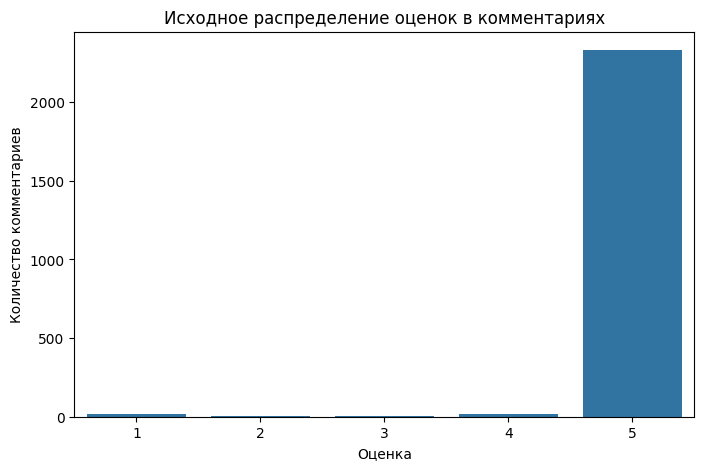


=== Очистка данных ===
Исходное количество комментариев: 2373
Количество после удаления дубликатов: 1812
Количество после удаления пустых: 1812

=== Объединение оценок 4 и 5 ===
Новое распределение оценок после объединения 4 и 5:
rating
1      14
2       2
3       5
5    1791
Name: count, dtype: int64


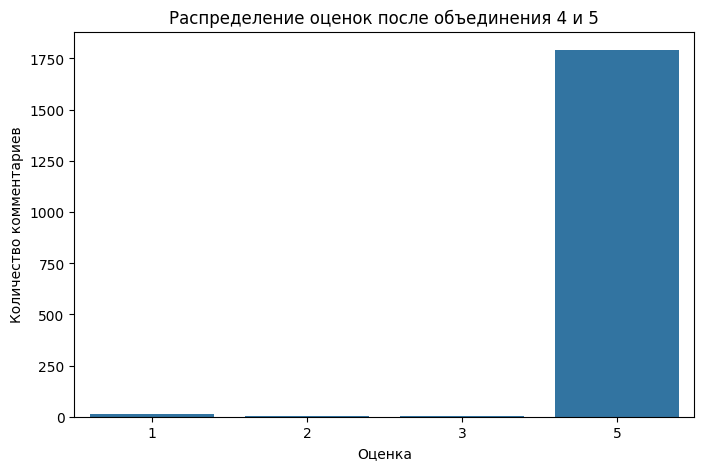


=== Инициализация анализа текста ===

=== Стратегический отбор комментариев ===

Комментариев без ключевых слов в строгом наборе: 0
Общее количество в строгом наборе: 486

Распределение оценок в строгом наборе:
original_rating
5    483
4      3
Name: count, dtype: int64

Результаты сохранены:
- Строгий набор (объединенные 4-5★, ≥4 слов): 486 комментариев
- Расширенный набор (все объединенные 4-5★): 1264 комментариев


In [12]:
# Загрузка данных
df = pd.read_csv('data/isxod.csv')

# 1. Первичный осмотр данных
print("=== Первичный анализ данных ===")
print("\nПервые 5 строк данных:")
display(df.head())

print("\nОсновная информация о данных:")
df.info()

print("\nСтатистика по числовым столбцам:")
display(df.describe(include='all'))

# 2. Анализ распределения оценок (rating)
print("\n=== Анализ оценок ===")
df['original_rating'] = df['rating']  # Сохраняем исходные оценки
rating_counts = df['rating'].value_counts().sort_index()
print("Исходное распределение оценок:")
print(rating_counts)

plt.figure(figsize=(8, 5))
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.title('Исходное распределение оценок в комментариях')
plt.xlabel('Оценка')
plt.ylabel('Количество комментариев')
plt.show()

# 3. Очистка данных
print("\n=== Очистка данных ===")
print(f"Исходное количество комментариев: {len(df)}")

# Удаление дубликатов
df.drop_duplicates(subset=['comment'], inplace=True)
print(f"Количество после удаления дубликатов: {len(df)}")

# Удаление пустых комментариев
df = df[df['comment'].notna() & (df['comment'].str.strip() != '')]
print(f"Количество после удаления пустых: {len(df)}")

# Функция для очистки текста
def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = re.sub(r'\s+', ' ', text)  # Заменяем множественные пробелы
    text = re.sub(r'\n', ' ', text)   # Удаляем переносы строк
    text = re.sub(r'\t', ' ', text)   # Удаляем табуляции
    text = text.strip()               # Удаляем пробелы по краям
    return text

# Применяем очистку ко всем комментариям
df['comment'] = df['comment'].apply(clean_text)

# 4. Объединение оценок 4 и 5
print("\n=== Объединение оценок 4 и 5 ===")
df['rating'] = df['rating'].apply(lambda x: 5 if x in [4, 5] else x)
new_rating_counts = df['rating'].value_counts().sort_index()
print("Новое распределение оценок после объединения 4 и 5:")
print(new_rating_counts)

plt.figure(figsize=(8, 5))
sns.barplot(x=new_rating_counts.index, y=new_rating_counts.values)
plt.title('Распределение оценок после объединения 4 и 5')
plt.xlabel('Оценка')
plt.ylabel('Количество комментариев')
plt.show()

# 5. Инициализация инструментов для анализа текста
print("\n=== Инициализация анализа текста ===")

# Решение проблемы с inspect.getargspec
def get_argspec(func):
    argspec = inspect.getfullargspec(func)
    return inspect.ArgSpec(argspec.args, argspec.varargs, argspec.varkw, argspec.defaults)

if not hasattr(inspect, 'getargspec'):
    inspect.getargspec = get_argspec

russian_function_words = {
    'и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 
    'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же',
    'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от',
    'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже',
    'ну', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до',
    'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя',
    'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней',
    'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто',
    'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто',
    'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь',
    'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были',
    'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два',
    'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через',
    'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три',
    'эту', 'моя', 'впрочем', 'хорошо', 'свою', 'этой', 'перед', 'иногда',
    'лучше', 'чуть', 'том', 'нельзя', 'такой', 'им', 'более', 'всегда',
    'конечно', 'всю', 'между'
}

# Инициализация морфологического анализатора
morph = pymorphy3.MorphAnalyzer()
stop_words = set(stopwords.words('russian')).union(russian_function_words)

# Список позитивных слов (расширенный)
positive_words = {
    'спасибо', 'благодарю', 'отлично', 'прекрасно', 'супер', 
    'быстро', 'оперативно', 'качественно', 'профессионал', 'молодец',
    'доволен', 'довольна', 'рекомендую', 'замечательно', 'великолепно',
    'аккуратно', 'внимательный', 'вежливый', 'пунктуальный', 'своевременно'
}

def is_positive_comment(text):
    """Функция для определения позитивных комментариев"""
    if not isinstance(text, str):
        return False
    
    # Токенизация и лемматизация
    tokens = word_tokenize(text.lower())
    lemmas = [morph.parse(token)[0].normal_form for token in tokens if token.isalpha()]
    
    # Удаление стоп-слов
    lemmas = [lemma for lemma in lemmas if lemma not in stop_words]
    
    # Проверка на наличие хотя бы одного позитивного слова
    return any(lemma in positive_words for lemma in lemmas)

# Применяем фильтр
df['is_positive'] = df['comment'].apply(is_positive_comment)

def count_meaningful_words(text):
    if not isinstance(text, str):
        return 0
    
    tokens = word_tokenize(text.lower())
    meaningful_words = []
    
    for token in tokens:
        # Пропускаем пунктуацию, цифры и символы
        if not token.isalpha():
            continue
            
        # Анализируем часть речи
        parsed = morph.parse(token)[0]
        
        # Игнорируем служебные части речи
        if any(tag in parsed.tag for tag in ['PREP', 'CONJ', 'PRCL', 'INTJ']):
            continue
            
        meaningful_words.append(token)
    
    return len(meaningful_words)

# 6. Стратегический отбор комментариев
print("\n=== Стратегический отбор комментариев ===")

# Создаем необходимые столбцы
df['comment_length'] = df['comment'].str.len()
df['word_count'] = df['comment'].apply(count_meaningful_words)
df['unique_words'] = df['comment'].apply(lambda x: len(set(x.lower().split())))

# Оптимизированные списки ключевых слов с лемматизацией
keywords = {
    'speed': ['быстр', 'оперативн', 'мгновенн', 'ускорен', 'срочн', 'без задержек'],
    'quality': ['качеств', 'профессионал', 'аккуратн', 'тщательн', 'добротн', 'на высоте'],
    'staff': ['мастер', 'сотрудник', 'специалист', 'работник', 'менеджер', 
             'благодар', 'спасибо', 'молодец'],
    'execution': ['сделал', 'выполнил', 'завершил', 'провёл', 'исполнил'],
    'solved': ['решил', 'исправил', 'устранил', 'проблем', 'вопрос']
}

# Упрощенный подсчет ключевых слов
for category, words in keywords.items():
    df[f'{category}_keywords'] = df['comment'].apply(
        lambda x: sum(1 for word in words if word in x.lower())
    )

# Формула оценки
df['selection_score'] = (
    df['comment_length'] * 0.3 +
    df['word_count'] * 0.2 +
    df['unique_words'] * 0.2 +
    df[[f'{cat}_keywords' for cat in keywords]].sum(axis=1) * 0.3
)

# Строгий фильтр (основной набор для обучения)
df_strict = df[
    (df['rating'] == 5) &  # Только объединенный позитивный класс
    (df['comment_length'] >= 30) &
    (df['word_count'] >= 4) &
    (df['is_positive']) &
    (df[[f'{cat}_keywords' for cat in keywords]].sum(axis=1) >= 1)
].copy()

# Расширенный фильтр (дополнительные данные)
df_wide_positive = df[
    (df['rating'] == 5) &  # Только объединенный позитивный класс
    (df['is_positive'])
].copy()

# Создаем df_wide с нужной структурой столбцов
df_wide = df_wide_positive[[
    'comment',
    'Нравится скорость отработки заявок',
    'Нравится качество выполнения заявки',
    'Нравится качество работы сотрудников',
    'Понравилось выполнение заявки',
    'Вопрос решен',
    'id',
    'original_rating',
    'selection_score'
]].copy()

# Список целевых колонок
target_columns = [
    'Нравится скорость отработки заявок',
    'Нравится качество выполнения заявки',
    'Нравится качество работы сотрудников',
    'Понравилось выполнение заявки',
    'Вопрос решен'
]

# Заполняем пропущенные значения нулями
df_wide[target_columns] = df_wide[target_columns].fillna(0).astype(int)

# Анализ перед сохранением
print(f"\nКомментариев без ключевых слов в строгом наборе: {(df_strict[[f'{cat}_keywords' for cat in keywords]].sum(axis=1) == 0).sum()}")
print(f"Общее количество в строгом наборе: {len(df_strict)}")
print("\nРаспределение оценок в строгом наборе:")
print(df_strict['original_rating'].value_counts())

# Сохранение результатов
df_strict.to_csv('data/strict_positive_comments.csv', index=False)
df_wide.to_csv('data/wide_positive_comments.csv', index=False)

print("\nРезультаты сохранены:")
print(f"- Строгий набор (объединенные 4-5★, ≥4 слов): {len(df_strict)} комментариев")
print(f"- Расширенный набор (все объединенные 4-5★): {len(df_wide)} комментариев")

In [13]:
# Проверка распределения
print('Распределения')
print(df_strict['rating'].value_counts(normalize=True))
print('\n')

# Проверить минимальные значения
print('Минимальные значения')
print(df_strict[['comment_length', 'word_count']].min())
print('\n')

# Самые короткие
print('Самые короткие')
print(df_strict.sort_values('word_count').head()[['comment', 'rating']])
print('\n')

# С низким selection_score
print('С низким selection_score')
print(df_strict.sort_values('selection_score').head()[['comment', 'selection_score']])
print('\n')

# Сколько комментариев имеют 0 ключевых слов
print('Сколько комментариев имеют 0 ключевых слов')
print((df_strict[[f'{cat}_keywords' for cat in keywords]].sum(axis=1) == 0).sum())


Распределения
rating
5    1.0
Name: proportion, dtype: float64


Минимальные значения
comment_length    30
word_count         4
dtype: int64


Самые короткие
                                                comment  rating
2274  по состоянию на 18:12, 28.01 оба лифта работаю...       5
2258  спасибо, хоть и очень не оперативно, заявка вы...       5
2040            спасибо большое!!! вы очень аперативные       5
318      Спасибо! Сервис работает, это самое главное :)       5
344   Большое спасибо , оперативно поставили огранич...       5


С низким selection_score
                                comment  selection_score
2174     быстро пришли. течь устранили.             11.2
627     Очень оперативно! всë исправили             11.5
446     всё супер, вопрос решён быстро)             11.7
1026  быстро отключили пожарную вытяжку             11.8
890   Пришли,, окна подкрутили. Быстро.             11.8


Сколько комментариев имеют 0 ключевых слов
0


In [14]:
# 7. Подготовка JSON для Label Studio
print("\n=== Подготовка данных для Label Studio ===")

tasks = []
for _, row in df_strict.iterrows():
    task = {
        "data": {
            "text": row['comment'],
            "metadata": {
                "id": int(row['id']),
                "original_rating": int(row['original_rating']),
                "length": int(row['comment_length']),
                "word_count": int(row['word_count']),
                "unique_words": int(row['unique_words']),
                "selection_score": float(row['selection_score']),
                **{f"{cat}_keywords": int(row[f'{cat}_keywords']) for cat in keywords}
            }
        }
    }
    tasks.append(task)

# Сохраняем в JSON
with open('data/comments_for_labelstudio.json', 'w', encoding='utf-8') as f:
    json.dump(tasks, f, ensure_ascii=False, indent=2)

# Сохранение информации об отборе
selection_info = {
    'total_processed': len(df),
    'total_selected': len(df_strict),
    'rating_processing': {
        'original_distribution': rating_counts.to_dict(),
        'processed_distribution': new_rating_counts.to_dict(),
        'transformation': "Объединение оценок 4 и 5 как позитивный класс"
    },
    'selection_stats': {
        'original_rating_distribution': df_strict['original_rating'].value_counts().to_dict(),
        'length_stats': {
            'mean': float(df_strict['comment_length'].mean()),
            'min': int(df_strict['comment_length'].min()),
            'max': int(df_strict['comment_length'].max())
        },
        'word_stats': {
            'mean': float(df_strict['word_count'].mean()),
            'min': int(df_strict['word_count'].min()),
            'max': int(df_strict['word_count'].max())
        },
        'score_stats': {
            'mean': float(df_strict['selection_score'].mean()),
            'min': float(df_strict['selection_score'].min()),
            'max': float(df_strict['selection_score'].max())
        }
    },
    'selection_criteria': {
        'min_rating': 5,
        'min_words': 4,
        'weights': {
            'comment_length': 0.3,
            'word_count': 0.2,
            'unique_words': 0.2,
            'keywords_total': 0.3
        },
        'positive_keywords': list(positive_words),
        'category_keywords': keywords
    },
    'timestamp': pd.Timestamp.now().isoformat()
}

with open('data/selection_info.json', 'w', encoding='utf-8') as f:
    json.dump(selection_info, f, ensure_ascii=False, indent=2)

print("\nДополнительная информация об отборе сохранена в data/selection_info.json")
print("Готово! Данные можно загружать в Label Studio.")


=== Подготовка данных для Label Studio ===

Дополнительная информация об отборе сохранена в data/selection_info.json
Готово! Данные можно загружать в Label Studio.


#### Обработка размеченных данных 

In [15]:
import json
import pandas as pd
from collections import defaultdict

def process_labeled_comments(input_file, output_file):
    # Загрузка размеченных данных
    with open(input_file, 'r', encoding='utf-8') as f:
        labeled_data = json.load(f)
    
    processed_data = []
    category_stats = defaultdict(int)
    skipped_count = 0
    
    for item in labeled_data:
        # Проверяем, был ли комментарий пропущен (имеет метку skipped)
        if any(ann.get('was_cancelled') for ann in item.get('annotations', [])):
            skipped_count += 1
            continue
            
        # Проверяем, есть ли разметка (не пропущен и имеет аннотации)
        if not item.get('annotations'):
            continue
            
        text = item['data']['text']
        annotations = item['annotations'][0]  # Берем первую аннотацию
        
        # Инициализируем все категории как 0
        row = {
            'comment': text,
            'Нравится скорость отработки заявок': 0,
            'Нравится качество выполнения заявки': 0,
            'Нравится качество работы сотрудников': 0,
            'Понравилось выполнение заявки': 0,
            'Вопрос решен': 0,
            'id': item['data'].get('metadata', {}).get('id', ''),
            'original_rating': item['data'].get('metadata', {}).get('original_rating', ''),
            'selection_score': item['data'].get('metadata', {}).get('selection_score', '')
        }
        
        # Обрабатываем результаты аннотации
        for result in annotations.get('result', []):
            if 'value' in result and 'choices' in result['value']:
                for choice in result['value']['choices']:
                    if choice in row:
                        row[choice] = 1
                        category_stats[choice] += 1
        
        processed_data.append(row)
    
    # Создаем DataFrame
    labeled_df = pd.DataFrame(processed_data)
    
    # Сохранение в CSV
    labeled_df.to_csv(output_file, index=False, encoding='utf-8')
    
    # Анализ результатов
    print(f"Всего задач в файле: {len(labeled_data)}")
    print(f"Пропущено (skipped): {skipped_count}")
    print(f"Успешно обработано: {len(labeled_df)}")
    print("\nРаспределение по категориям:")
    for category, count in category_stats.items():
        print(f"{category}: {count} ({count/len(labeled_df):.1%})")
    
    return labeled_df

# Обработка файла
labeled_comments = process_labeled_comments(
    input_file='data/raz_comment.json',
    output_file='data/processed_labeled_comments.csv'
)

# Дополнительный анализ
print("\nКомментарии с несколькими метками:")
multi_label = labeled_comments.drop(columns=['comment', 'id', 'original_rating', 'selection_score']).sum(axis=1)
print(f"Всего {sum(multi_label > 1)} комментариев с несколькими метками")

Всего задач в файле: 332
Пропущено (skipped): 12
Успешно обработано: 320

Распределение по категориям:
Нравится скорость отработки заявок: 223 (69.7%)
Нравится качество работы сотрудников: 195 (60.9%)
Понравилось выполнение заявки: 143 (44.7%)
Вопрос решен: 202 (63.1%)
Нравится качество выполнения заявки: 90 (28.1%)

Комментарии с несколькими метками:
Всего 280 комментариев с несколькими метками
